In [55]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy

In [56]:
path_arduino_file = "data/couples/20240306/001/arduino_16G.txt"

path_phone_file = "data/couples/20240306/001/2024-03-0614.42.34.csv"


time_limit_low = 10000
time_limit_high = 40000

time_decalage = 5900

Version 2 du script, on mets les fichiers par couples dans un repertoire.
Fichiers téléphone et arduino.


<Axes: xlabel='time'>

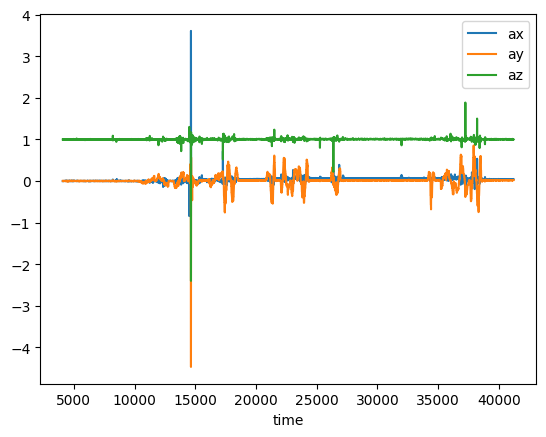

In [57]:
df = pd.read_csv(path_arduino_file, sep='\t')
df.plot(x="time", y=["ax", "ay", "az"])

In [58]:
df.describe()

counter          time            ax            ay            az
count  10297.000000  10297.000000  10297.000000  10297.000000  10297.000000
mean    5148.000000  22587.087598      0.037226      0.009092      1.002157
std     2972.632195  10747.205655      0.075023      0.155026      0.066078
min        0.000000   4083.000000     -0.842520     -4.469190     -2.400860
25%     2574.000000  13253.000000      0.002210     -0.001420      0.997580
50%     5148.000000  22582.000000      0.042740      0.012250      1.003440
75%     7722.000000  31893.000000      0.062760      0.019580      1.009300
max    10296.000000  41230.000000      3.607190      0.853560      1.885270

counter
time
ax
ay
az


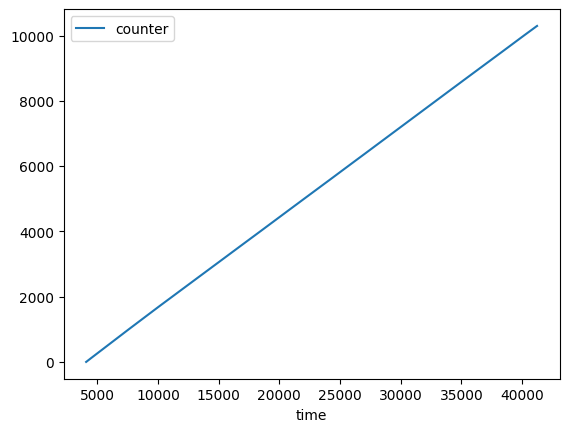

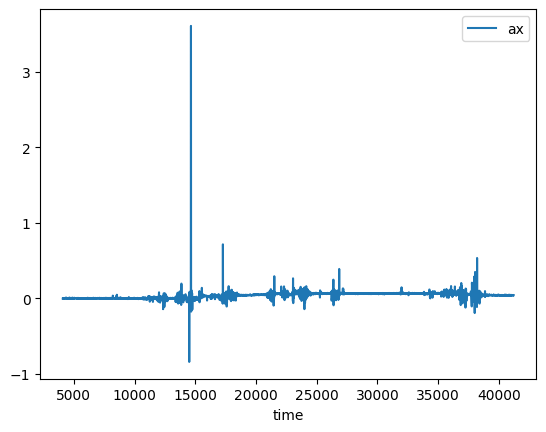

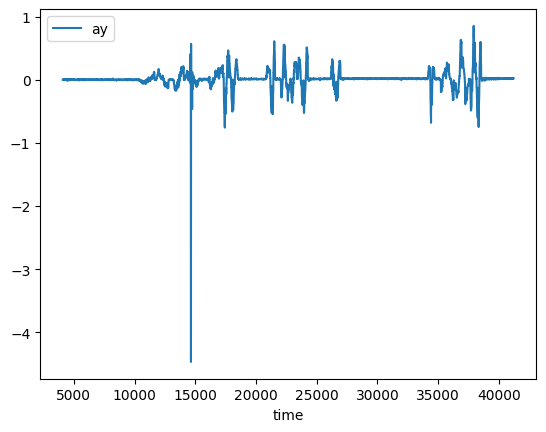

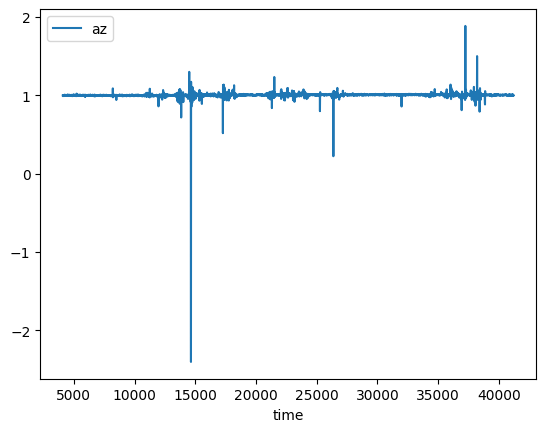

In [59]:
# iterating the columns
for col in df.columns:
    print(col)
    if col != "time":
        df.plot(x="time", y=col)

In [60]:
df["speed"] = df["ax"]**2 + df["ay"]**2 + df["az"]**2 

<Axes: xlabel='time'>

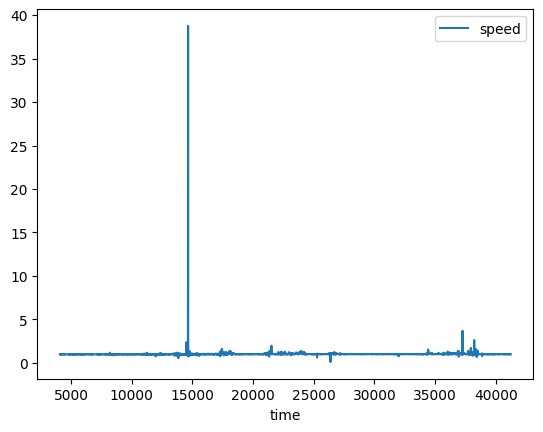

In [61]:
df.plot(x="time", y="speed")


In [62]:
df["ay_bis"] = df["ay"] * 6.66


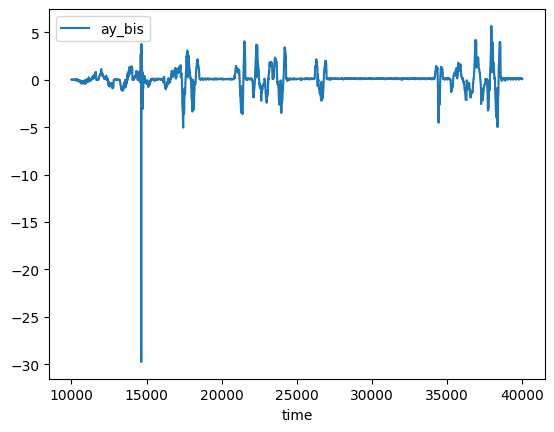

In [63]:
ax = df[(df["time"] > time_limit_low) & (df["time"]<time_limit_high)].plot(x="time", y="ay_bis")

# On mets les 2 courbes sur le même graph

cela necessite un peu de cuisine ...

<Axes: xlabel='time_bis'>

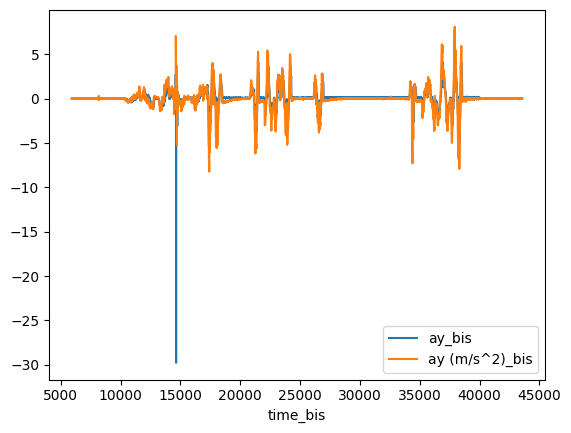

In [64]:
df_phone = pd.read_csv(path_phone_file, sep=';', decimal=",")
df_phone["time_bis"] = df_phone["time"] * 1000+time_decalage
df_phone["ay (m/s^2)_bis"] = df_phone["ay (m/s^2)"]
ax = df[(df["time"] > time_limit_low) & (df["time"]<time_limit_high)].plot(x="time", y="ay_bis")
df_phone.plot(ax=ax, x="time_bis", y="ay (m/s^2)_bis")

<Axes: xlabel='time'>

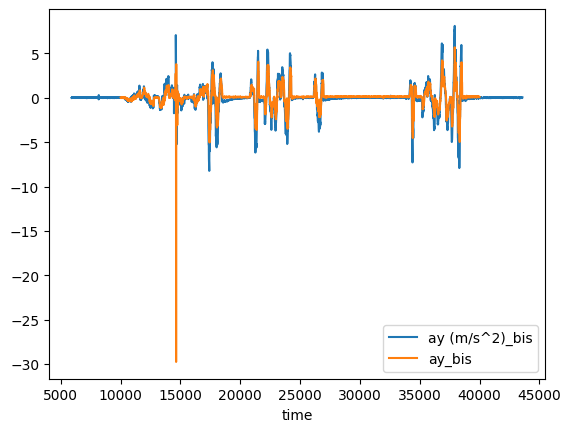

In [88]:
df_phone["time_bis"] = df_phone["time"] * 1000+time_decalage
df_phone["ay (m/s^2)_bis"] = df_phone["ay (m/s^2)"]
ax = df_phone.plot(x="time_bis", y="ay (m/s^2)_bis")
df[(df["time"] > time_limit_low) & (df["time"]<time_limit_high)].plot(ax=ax, x="time", y="ay_bis")


In [66]:
df_phone.head()

time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)  time_bis  \
0  0.001575     -0.0584     -0.0201      0.2358       0.244  4901.575   
1  0.002612      0.0045     -0.0435      0.3667       0.369  4902.612   
2  0.007515     -0.0187     -0.0437      0.3162       0.320  4907.515   
3  0.011914     -0.0229     -0.0393      0.1143       0.123  4911.914   
4  0.017052     -0.0418      0.0081     -0.0291       0.052  4917.052   

   ay (m/s^2)_bis  
0         -0.0201  
1         -0.0435  
2         -0.0437  
3         -0.0393  
4          0.0081

<Axes: xlabel='time'>

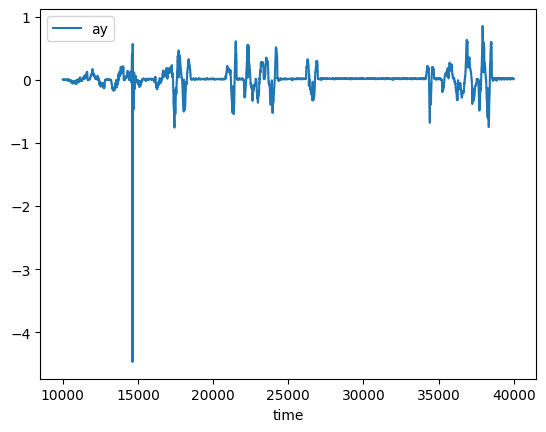

In [67]:
df[(df["time"] > time_limit_low) & (df["time"]<time_limit_high)].plot(x="time", y="ay")

# On travaille sur les moyennes mobiles
On enleve le bruit

<Axes: xlabel='time'>

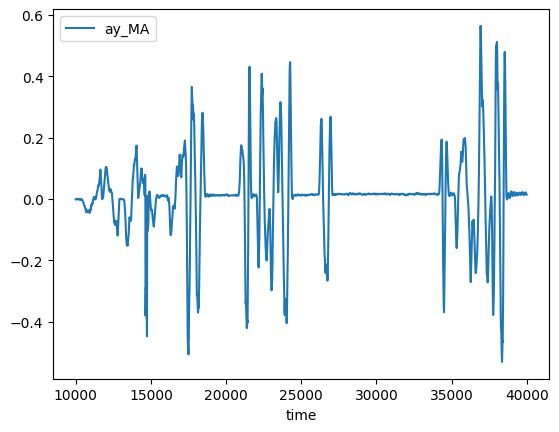

In [68]:
# Arduino 
df["ay_MA"] = df['ay'].rolling(30).mean()

df[(df["time"] > time_limit_low) & (df["time"]< time_limit_high)].plot(x="time", y ="ay_MA")

<Axes: xlabel='time'>

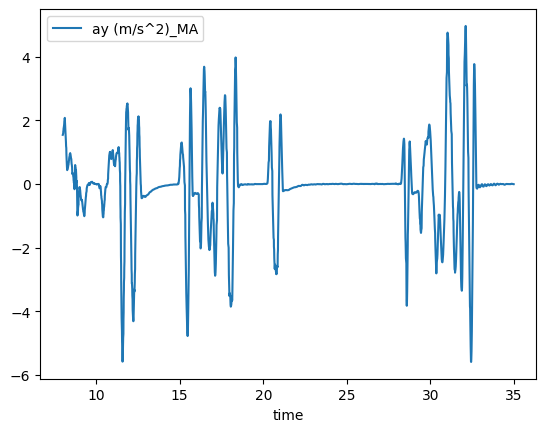

In [69]:
# Téléphone 
df_phone["ay (m/s^2)_MA"] = df_phone["ay (m/s^2)"].rolling(30).mean()

df_phone[(df_phone["time"] > 8) & (df_phone["time"]< 35)].plot(x="time", y ="ay (m/s^2)_MA")
# 

# Superposition des courbes
On superpose les courbes :
decalage temporelles de la courbe phone : on multiplie par 1000 et on ajoute 4 secondes
moyenne mobile de 30 sur les 2 courbes,
on multiplie les valeurs y de arduino par 6,66 pour mettre à l'echelle du téléphone

On commence l'affichage à 12500 milliseconde et on l'arrete à 250000 millliseconde

<Axes: xlabel='time_bis'>

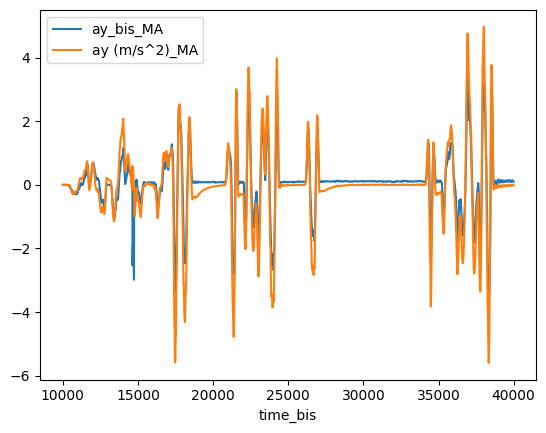

In [89]:

df_phone["time_bis"] = df_phone["time"] * 1000+time_decalage
df["ay_bis_MA"] = (df["ay"] * 6.666).rolling(30).mean()
df_phone["ay (m/s^2)_MA"] = df_phone["ay (m/s^2)"].rolling(30).mean()

# ax = df[(df["time"] > 12500) & (df["time"]< 25000)].plot(x="time", y ="ay_bis_MA")
# df_phone[(df_phone["time_bis"] > 12500) & (df_phone["time_bis"]< 25000)].plot(ax=ax, x="time_bis", y ="ay (m/s^2)_MA")

ax = df[(df["time"] > time_limit_low) & (df["time"]< time_limit_high)].plot(x="time", y ="ay_bis_MA")
df_phone[(df_phone["time_bis"] > time_limit_low) & (df_phone["time_bis"]< time_limit_high)].plot(ax=ax, x="time_bis", y ="ay (m/s^2)_MA")


#ax = df.plot(x="time", y ="ay_bis_MA")
#df_phone.plot(ax=ax, x="time_bis", y ="ay (m/s^2)_MA")

# Correlation ?

on fait un nouveau dataframe avec les données de arduino et phone et on regarde la correlation ...

In [71]:
new_df = df[(df["time"] > time_limit_low) & (df["time"]< time_limit_high)][['time', 'ay_bis_MA']].copy()

new_df_phone = df_phone[(df_phone["time_bis"] > time_limit_low) & (df_phone["time_bis"]< time_limit_high)][["time_bis", "ay (m/s^2)_MA"]].copy()



new_df.head()
#new_df_phone.head()
#print("done")


time  ay_bis_MA
1676  10003  -0.006526
1677  10006  -0.005442
1678  10011  -0.004357
1679  10014  -0.003273
1680  10016  -0.000778

In [72]:
new_df_phone["time_bis"] = new_df_phone["time_bis"].round(0).astype(int)


In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8285 entries, 1676 to 9960
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       8285 non-null   int64  
 1   ay_bis_MA  8285 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 194.2 KB


In [74]:
new_df_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 868 to 7208
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_bis       6341 non-null   int64  
 1   ay (m/s^2)_MA  6341 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 148.6 KB


In [75]:
new_df.count()
new_df.head()

time  ay_bis_MA
1676  10003  -0.006526
1677  10006  -0.005442
1678  10011  -0.004357
1679  10014  -0.003273
1680  10016  -0.000778

In [76]:
new_df.corrwith(new_df)

time         1.0
ay_bis_MA    1.0
dtype: float64

<Axes: >

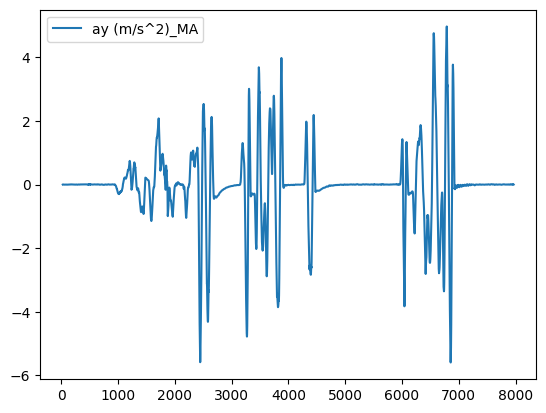

In [77]:
df_phone.plot(y="ay (m/s^2)_MA")

<Axes: >

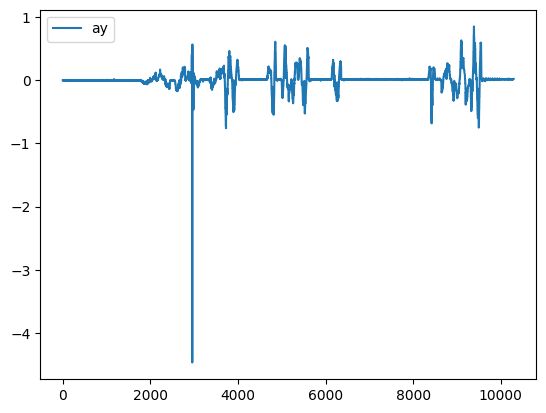

In [78]:
df.plot(y="ay")

/tmp/ipykernel_436130/2555035885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df_phone_bins = new_df_phone.groupby(pd.cut(new_df_phone["time_bis"], np.arange(0, 40000, 30))).mean()


<Axes: xlabel='time_bis'>

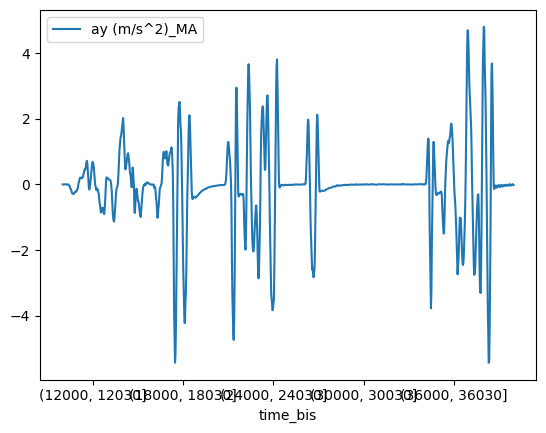

In [79]:
# new_df_phone["time_bis"]
new_df_phone_bins = new_df_phone.groupby(pd.cut(new_df_phone["time_bis"], np.arange(0, 40000, 30))).mean()
new_df_phone_bins.plot(y="ay (m/s^2)_MA")

/tmp/ipykernel_436130/3676899136.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  new_df_bins = new_df.groupby(pd.cut(new_df["time"], np.arange(0, 40000, 30))).mean()


<Axes: xlabel='time'>

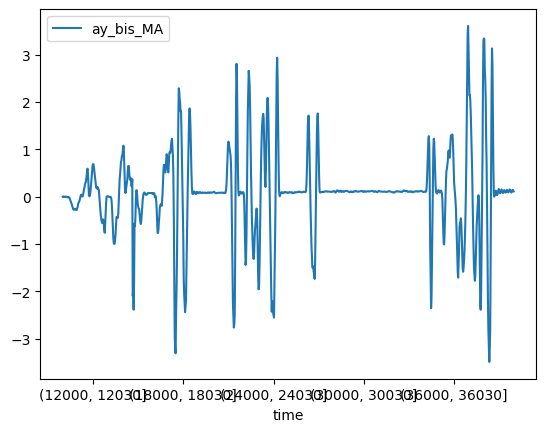

In [80]:
#new_df

new_df_bins = new_df.groupby(pd.cut(new_df["time"], np.arange(0, 40000, 30))).mean()
new_df_bins.plot(y="ay_bis_MA")

In [81]:
new_df_phone["time_bis"].max()

40000

In [82]:
new_df_phone_bins.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 1333 entries, (0, 30] to (39960, 39990]
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_bis       1000 non-null   float64
 1   ay (m/s^2)_MA  1000 non-null   float64
dtypes: float64(2)
memory usage: 76.5 KB


In [83]:
new_df_bins["ay_bis_MA"].corr(new_df_phone_bins["ay (m/s^2)_MA"])

0.9615891853732722

In [84]:
new_df_bins["ay_bis_MA"].corr(new_df_phone_bins["ay (m/s^2)_MA"], method="spearman")

0.8042692730948887

In [85]:
new_df_bins["ay_bis_MA"].corr(new_df_phone_bins["ay (m/s^2)_MA"], method="kendall")

0.6543957044972163

In [86]:
new_df_bins["ay_bis_MA"].corr(new_df_phone_bins["ay (m/s^2)_MA"], method="pearson")

0.9615891853732722

In [87]:
new_df_bins.head(40)

time  ay_bis_MA
time                         
(0, 30]        NaN        NaN
(30, 60]       NaN        NaN
(60, 90]       NaN        NaN
(90, 120]      NaN        NaN
(120, 150]     NaN        NaN
(150, 180]     NaN        NaN
(180, 210]     NaN        NaN
(210, 240]     NaN        NaN
(240, 270]     NaN        NaN
(270, 300]     NaN        NaN
(300, 330]     NaN        NaN
(330, 360]     NaN        NaN
(360, 390]     NaN        NaN
(390, 420]     NaN        NaN
(420, 450]     NaN        NaN
(450, 480]     NaN        NaN
(480, 510]     NaN        NaN
(510, 540]     NaN        NaN
(540, 570]     NaN        NaN
(570, 600]     NaN        NaN
(600, 630]     NaN        NaN
(630, 660]     NaN        NaN
(660, 690]     NaN        NaN
(690, 720]     NaN        NaN
(720, 750]     NaN        NaN
(750, 780]     NaN        NaN
(780, 810]     NaN        NaN
(810, 840]     NaN        NaN
(840, 870]     NaN        NaN
(870, 900]     NaN        NaN
(900, 930]     NaN        NaN
(930, 960]     NaN        NaN
(960, 990]     NaN        NaN
(990, 1020]    NaN        NaN
(1020, 1050]   NaN        NaN
(1050, 1080]   NaN        NaN
(1080, 1110]   NaN        NaN
(1110, 1140]   NaN        NaN
(1140, 1170]   NaN        NaN
(1170, 1200]   NaN        NaN